## <font color=blue> Python Lab #10 </font>: Understanding Entropy Coding: Part II
### *Huffman and Arithmetic Coding* 


### Homework submission: School MOOC system
### <font color=red> Due date: Dec. 17 (Friday), 24:00 </font>
#### <font color=red> NOTE </font>: 
#1 ipynb file format should be <font color=red> LAB10_yourIDnumber.ipynb </font> ( ex:  LAB10_20185433224234.ipynb ).
#2 If you don't follow the instructions #1, there is <font color=red>10 % penalty</font>.

#3 Any copied submission won't be graded. 
> 1) i.e., 0 point for every same copy. <br>
> 2) Also, slight modification of one version will be regarded as copy. </font>
>```python
>if copy found:
>    for all copies:
>        score = 0
>```    

----



### Huffman coding


1. __Initialization__: put all symbols on the list sorted according to their frequency counts.
2. __Repeat__ until the list has only one symbol left.
    * From the list, pick two symbols with the lowest frequency counts. From a Huffman subtree that has these two symbols as child nodes and create a parent node for them.
    * Assign the sum of the children’s frequency counts to the parent and insert it into the list, such that the order is maintained.
    * Delete the children from the list.
3. __Assign a codeword__ for each leaf based on the path from the root.

The above pseudocode can be __summarized__ as:
1. __Sort symbols__ by their probabilities.
2. __Pick__ two symbols with the __lowest probabilities__.
3. __Merge__ the two symbols and __remove__ the chosen symbols.
When we have only one symbol left. __Traverse__ the built binary tree and __assign '0' or '1'__.

There are many ways to implement Huffman coding. Among them, using a tree structure is one of the most common way. However, using a tree is not that intuitive to see how the algorithm works.
There are some options to implement Huffman code.
1. Using `tree` structure (Need to implement tree first)
2. Using `heapq` structure in Python
3. Using `recursion` (Since 1 to 3 steps in the summary and bit assigning performs repeatedly)
4. Using `two dictionaries` (One for symbol and prob., another for symbol and code mapping)

The 4th one can be the most intuitive way to implement Huffman code and very similar procedure as we saw in the lecture slide.

This is an example of how to use dictionaries for Huffman coding.

#### Using two dictionaries
* Probability dictionary

|Symbol|Prob.|
|:-:|:-:|
|A|0.1|
|B|0.3|
|C|0.6|

* Code dictionary

|Symbol|Code|
|:-:|:-:|
|A|00|
|B|01|
|C|1|

### Some tips
#### Sorting a dictionary by key
In fact, it's not sorting a dictionary but rather generating a new sorted dictionary.

In [1]:
myDict = { 'C': 0.7, 'A': 0.2, 'B': 0.1 }

sortedDict = dict((key, myDict[key]) for key in sorted(myDict.keys()))
print(sortedDict)

{'A': 0.2, 'B': 0.1, 'C': 0.7}


#### Sorting a dictionary by value

In [2]:
myDict = { 'C': 0.7, 'A': 0.2, 'B': 0.1 }

sortedDict2 = dict((k, myDict[k]) for k in sorted(myDict, key=myDict.get, reverse=False))
print(sortedDict2)

{'B': 0.1, 'A': 0.2, 'C': 0.7}


We can use lambda function too.

Reminder:

In [3]:
fun = lambda x : x ** 2

print(fun(3))

(lambda x : x ** 2)(3) # Anonymous lambda function

9


9

__by values__

In [4]:
myDict = { 'C': 0.7, 'A': 0.2, 'B': 0.1 }

sortedDict3 = dict(sorted(myDict.items(), key= lambda item: item[1]))
print(sortedDict3)

{'B': 0.1, 'A': 0.2, 'C': 0.7}


__by keys__

In [5]:
myDict = { 'C': 0.7, 'A': 0.2, 'B': 0.1 }

sortedDict4 = dict(sorted(myDict.items(), key= lambda item: item[0]))
print(sortedDict4)

{'A': 0.2, 'B': 0.1, 'C': 0.7}


If we need only sorted key by its value, then this also works.

In [6]:
myDict = { 'C': 0.7, 'A': 0.2, 'B': 0.1 }

sortedKeys = sorted(myDict, key= myDict.get)
print(sortedKeys)
print(myDict.get('C'))

['B', 'A', 'C']
0.7


This is how to merge two dictionaries using dictionary method `update()`.

In [7]:
aDict = { 'C': 0.1, 'A': 0.2, 'B': 0.3 }
bDict = { 'E': 0.2, 'G': 0.15, 'F': 0.05 }

aDict.update(bDict)
print(aDict)

{'C': 0.1, 'A': 0.2, 'B': 0.3, 'E': 0.2, 'G': 0.15, 'F': 0.05}


#### (1) Write a Huffman code generating function HuffmanCode() according to the following conditions. And print the dictionary of symbol and code.

#### Condition:
* Input arg: symbol and probability dictionary
* Output (return value): symbol and code dictionary
* When sorting symbols with the same probabilities, Do <font color=red>__NOT__</font> change the order. (e.g., {A:0.1, B:0.1}).
* Do <font color=red>__NOT__</font> use `tree`, `heapq` structure, or `recursion`.
* The order used in the lecture slides is in __ascending order from the bottom__ and we can interpret this as a transposed vecter. When we sort the dictionary, the order should be in __ascending order from the left__.
* When you assign bits = {0, 1} to symbol, apply the same rule as the lecture slides, i.e., `1` to `top` and `0` to `bottom`.  
* Don't need to repeat until **one symbol left** (this is tree based algorithm). In our case, **repeat until two symbols left**
* Input dictionary: <br> 
    1. {'A': 0.1, 'B': 0.19, 'C': 0.21, 'D': 0.3, 'E': 0.05, 'F': 0.05, 'G': 0.07, 'H': 0.03 } <br> (This is the same as lecture slides, so check the result), 
    2. {'A': 1.0} 
* Code: `string` data type

In [16]:
def HuffmanCode(myDict):
    codeDict = {}.fromkeys(myDict.keys(), '')
    
    if (len(myDict) < 2):
        key = list(myDict.keys())[0]
        codeDict[key] = 0
        return codeDict
        
    myList = []
    sortedDict = dict((k, myDict[k]) for k in sorted(myDict, key=myDict.get, reverse=False))
    sortedDict1 = dict((k, myDict[k]) for k in sorted(myDict, key=myDict.get, reverse=False))
    myList.append(sortedDict1)
    for i in range(len(sortedDict)-2):
        myList.append(sortedDict)
        keyList = list(sortedDict.keys())
        valueList = list(sortedDict.values())
        sortedDict[keyList[0]+keyList[1]] = round(valueList[0]+valueList[1],2)
        for j in keyList[0]:
            codeDict[j] += '0'
        for k in keyList[1]:
            codeDict[k] += '1'
        sortedDict.pop(keyList[0])
        sortedDict.pop(keyList[1])

        newDict = {}
        newDict[keyList[0]+keyList[1]] = round(valueList[0]+valueList[1],2)
        newDict.update(sortedDict)
        sortedDict = newDict
        sortedDict = dict(sorted(sortedDict.items(), key= lambda item: item[1]))
        
    for i in list(myList[-1].keys())[0]:
        codeDict[i] += '0'
    for i in list(myList[-1].keys())[1]:
        codeDict[i] += '1'   
    for k, v in codeDict.items():
        codeDict[k] = v[::-1]
        
    return codeDict
    
myDict1 = {'A': 0.1, 'B': 0.19, 'C': 0.21, 'D': 0.3, 'E': 0.05, 'F': 0.05, 'G': 0.07, 'H': 0.03 }
myDict2 = {'A': 1.0 }
codeDict1 = HuffmanCode(myDict1)
codeDict2 = HuffmanCode(myDict2)
print('Symbol', '\tCode')
print('----------------')
for k, v in codeDict1.items():
    print(k, '\t', v)
print('\nSymbol', '\tCode')
print('----------------')
for k, v in codeDict2.items():
    print(k, '\t', v)

Symbol 	Code
----------------
A 	 1011
B 	 00
C 	 01
D 	 11
E 	 10101
F 	 1000
G 	 1001
H 	 10100

Symbol 	Code
----------------
A 	 0


#### (2) Write a function which calculates the number of bits based on Huffman code, HuffmanCodeLength(). And print the number of Huffman coded bits and one table in the following format.


|Symbol|Code|Occurrence|
|-|-|-|
|A|1|34|
|B|01|14|
|C|00|12|

#### Condition:
* Input arg: `string` message.
* Output (return value): number of code bits (`int`), code `dictionary`, count `dictionary`.
* Input message: 'ABCABCABCABCABCAAAAAAAAAAAAAAAAABBCCCCCCCDDDDADDDDAADDDDDABC'


#### NOTE: 
* Example: Number of bits of 'AAABBBCCC' with {'A': 0, 'B': 10, 'C': 11} = 3\*1+3\*2+3\*2 = 15.
* Count dictionary means the occurrence of symbols. In the above example, A: 3, B: 3, C: 3.

In [22]:
message = 'ABCABCABCABCABCAAAAAAAAAAAAAAAAABBCCCCCCCDDDDADDDDAADDDDDABC'
print('Length of message: '+str(len(message)))
def HuffmanCodeLength(message):
    nDict = {}
    for i in range(len(message)):
        if message[i] in nDict.keys():
            nDict[message[i]]+=1
        else:
            nDict.update({message[i]:1})
    # nDict = {'A': 26, 'B': 8, 'C': 13, 'D': 13}
    
    mDict = {}
    keyList = list(nDict.keys())
    valueList = list(nDict.values())
    
    for j in range(len(nDict)):
        mDict.update({keyList[j]:round((valueList[j]/60),2)})
        
    codeDict = HuffmanCode(mDict)
    # codeDict = {'A': 26, 'B': 8, 'C': 13, 'D': 13}

    length = 0
    for k in nDict.keys():
        length += nDict[k]*len(codeDict[k])
        
    return length,codeDict,nDict
length,codeDict,nDict = HuffmanCodeLength(message)

print('Number of bits coded:'+str(length)+' bits')
    
print('\nSymbol	Code	Occurrence')
print('-----------------------')
for i in range(len(codeDict)):
    keys = list(codeDict.keys())
    v1 = list(codeDict.values())
    v2 = list(nDict.values())
    print(keys[i], '\t',v1[i], '\t',v2[i])
    


Length of message: 60
Number of bits coded:115 bits

Symbol	Code	Occurrence
-----------------------
A 	 0 	 26
B 	 110 	 8
C 	 111 	 13
D 	 10 	 13


### Arithmetic coding
#### Pseudocode of Encoder

``` python
BEGIN
	low = 0.0;   high = 1.0;   range = 1.0;
	while (symbol != terminator)
	{
		get (symbol);
        high = low + range * range_high(symbol);
        low = low + range * range_low(symbol);
		range = high – low;
	}
	output a code so that low <= code < high;
END

```

#### NOTE:
|Symbol|Prob.|Range|
|:----:|:----:|:----:|
|A|0.3|[0.0 0.3)|
|B|0.4|[0.3 0.7)|
|C|0.3|[0.7 1.0)|

* range_low(B) = 0.3, and range_high(B) = 0.7
* `numpy.cumsum()` can be useful to generate prob. range.

#### (3) Write an ArithmeticCodeRange() function which prints final low and high values and probability range table.

#### Condition:
* Input arg: message in `string`, symbol and probability `dictionary`.
* Output (return value): None.
* Input message: 'CAEE\$' (the same as lecture slides).
* Probability table: refer to the lecture slides.


In [80]:
def ArithmeticCodeRange(message,myDict):
    myList = [0]
    values = list(myDict.values())
    k = 0
    for j in range(len(values)):
        k+=values[j]
        myList.append(round(k,2))
    # myList = [0, 0.2, 0.3, 0.5, 0.55, 0.85, 0.9, 1.0]
    newDict = {'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'$':7}
    low = myList[newDict[message[0]]-1]
    high = myList[newDict[message[0]]]
    
    for i in range(1,len(message)):
        a = newDict[message[i]]
        b = low
        c = high-low
        low = b+c*myList[a-1]
        high = b+c*myList[a]
    
    print('Symbol', 'Prob. range')
    print('-----------------------')
    for i in range(len(myDict)):
        keys = list(myDict.keys())
        print(keys[i] + '\t[' + str(myList[i]) + ', ' + str(myList[i+1]) +')')
        
    print('\nlow =',round(low,8),',high =',round(high,8))
    return round(low,8),round(high,8);

myDict = {'A':0.2,'B':0.1,'C':0.2,'D':0.05,'E':0.3,'F':0.05,'$':0.1}
ArithmeticCodeRange('CAEE$',myDict);

Symbol Prob. range
-----------------------
A	[0, 0.2)
B	[0.2, 0.3)
C	[0.3, 0.5)
D	[0.5, 0.55)
E	[0.55, 0.85)
F	[0.85, 0.9)
$	[0.9, 1.0)

low = 0.33184 ,high = 0.3322


#### Range to arithmetic code

#### Pseudocode

``` python
BEGIN
	code = 0;
	k = 1;
	while (value(code) < low)
	{
		assign 1 to the k-th binary fraction bit;
		if (value(code) > high)
			replace the k-th bit by 0;
		k = k + 1;
	}
END

```


#### (4) Write a Range2Code() function based on the above pseudocode. And test with low = 0.33184000, high = 0.33220000 (the resulting code should be 01010101).

#### Condition:
**Range2Code()**
* Input arg: `float` low, high.
* Output: `string` code.

__NOTE__: 
* When the length of message becomes very long, this function may have a precision problem. However, with our input message and its length, there won't be any problem. 
* The below example shows how to check the precision of `float` data type.

In [14]:
import sys
sys.float_info

sys.float_info(max=1.7976931348623157e+308, max_exp=1024, max_10_exp=308, min=2.2250738585072014e-308, min_exp=-1021, min_10_exp=-307, dig=15, mant_dig=53, epsilon=2.220446049250313e-16, radix=2, rounds=1)

In [74]:
def Range2Code(low,high):
    code = ''
    codeList = []
    prevalue = 0.5
    value = 0
    valueList = []
    while value<low:
        if (value+prevalue)>high:
            code = code+'0'
        else:
            code = code+'1'
            value+=prevalue
        codeList.append(code)
        valueList.append(value)
        prevalue = prevalue/2
    
    for i in range(len(valueList)):
        print('value:',str("%.8f" % valueList[i]),'\t','code:',str(codeList[i]))
    print('\nfinal code: ',codeList[-1])
Range2Code(0.33184,0.3322)

value: 0.00000000 	 code: 0
value: 0.25000000 	 code: 01
value: 0.25000000 	 code: 010
value: 0.31250000 	 code: 0101
value: 0.31250000 	 code: 01010
value: 0.32812500 	 code: 010101
value: 0.32812500 	 code: 0101010
value: 0.33203125 	 code: 01010101

final code:  01010101


#### (5) By modifying ArithmeticCodeRange() function also using Range2Code() function, complete ArithmeticEncode() function. Print the final code of the given message below.

#### Condition:

**AtirthmeticEncode()**
* Input arg: `string` message, symbol and probability `dictionary` . 
* Output (return value): `string` code.
* Input message: 'CAEE\$' (the same as lecture slides).

In [82]:
def AtirthmeticEncode(message,myDict):
    low,high = ArithmeticCodeRange(message,myDict)
    print()
    Range2Code(low,high)
    
myDict = {'A':0.2,'B':0.1,'C':0.2,'D':0.05,'E':0.3,'F':0.05,'$':0.1}
AtirthmeticEncode('CAEE$',myDict)

Symbol Prob. range
-----------------------
A	[0, 0.2)
B	[0.2, 0.3)
C	[0.3, 0.5)
D	[0.5, 0.55)
E	[0.55, 0.85)
F	[0.85, 0.9)
$	[0.9, 1.0)

low = 0.33184 ,high = 0.3322

value: 0.00000000 	 code: 0
value: 0.25000000 	 code: 01
value: 0.25000000 	 code: 010
value: 0.31250000 	 code: 0101
value: 0.31250000 	 code: 01010
value: 0.32812500 	 code: 010101
value: 0.32812500 	 code: 0101010
value: 0.33203125 	 code: 01010101

final code:  01010101


### Arithmetic coding
#### Pseudocode of Decoder
* __value__ is the number that has been received. In other words, value is decimal conversion of code.<br>  In the former example, __code__ = 01010101 and its __value__ = 0.33203125. 


``` python
BEGIN
low = 0.0;   high = 1.0;   range = 1.0;
while(numSymbol < n):
    Find symbol such that
        range_low(symbol) <= (value - low)/(high - low) < range_high(symbol)

    range = high - low
    high = low + range * range_high(symbol)
    low = low + range * range_low(symbol)

    output symbol
END
```                            
                            

#### (6) Write an ArithmeticDecode() function and print the decoded message.

#### Condition:
* Input arg: `string` code, `int` number of symbol (in a code), symbol and probability `dictionary`.
* Output arg: `string` message.
* Input code: the final code stream of problem (5).
* Number of symbol: 5 (because the original message is 'CAEE\$').


In [27]:
def ArithmeticDecode(code,num,myDict):
    keys = list(myDict.keys())
    values = list(myDict.values())
    newList = [0]
    newDict = {}
    mes = ''
    
    for i in range(len(keys)):
        k = round(newList[i]+values[i],2)
        newList.append(k)
        newDict[keys[i]] = round(newList[i+1],2)
    # newDict = {'A': 0.2, 'B': 0.3, 'C': 0.5, 'D': 0.55, 'E': 0.85, 'F': 0.9, '$': 1.0}
    # newList = [0, 0.2, 0.3, 0.5, 0.55, 0.85, 0.9, 1.0]
    
    prevalue = 0.5
    value = 0
    j = 1
    while j<=len(code):
        if code[j-1] == '1':
            value+=prevalue
        prevalue = prevalue/2
        j+=1
    # value = 0.33203125
    
    m = 1
    while m<num:
        for n in range(1,len(newList)):
            if newList[n-1] <= value<newList[n]:
                mes=mes+keys[n-1]
                value-=newList[n-1]
                value/=values[n-1]
        m+=1
        if len(mes)==num:
            break
    print(mes)
    
    
myDict = {'A':0.2,'B':0.1,'C':0.2,'D':0.05,'E':0.3,'F':0.05,'$':0.1}
ArithmeticDecode('01010101',5,myDict)

CAEE$


#### (7) Slightly modify the function of problem (2) (i.e., Huffman coding) to calculate the number of coded bits for the message 'CAEE\$' (input message of arightmetic coding). <font color=red>Disscuss</font> why arithmetic code performs better than Huffman code.

#### Condition:
* Input arg: `string` message, symbol and probability `dictionary`.
* Output: `int` amount of Huffman code bits.

In [27]:
message = 'CAEE$'
Dict = {'A':0.2,'B':0.1,'C':0.2,'D':0.05,'E':0.3,'F':0.05,'$':0.1}

def HuffmanCodeLength1(message,myDict):
    code = HuffmanCode(myDict)
#     return code
    codes = ''
    for i in range(len(message)):
        codes+=code[message[i]]
        
    print('Symbol', '\tCode')
    print('----------------')
    for k, v in code.items():
        print(k, '\t', v)
        
    print('\nmessage: ',message)
    print('length of message: ',len(message))
    print('Huffman code stream:',codes)
    print('Number of bits coded:',len(codes),'bits')

HuffmanCodeLength1(message,Dict)

Symbol 	Code
----------------
A 	 00
B 	 1011
C 	 01
D 	 10100
E 	 11
F 	 10101
$ 	 100

message:  CAEE$
length of message:  5
Huffman code stream: 01001111100
Number of bits coded: 11 bits


<h> <font color=red> 
1. arithmetic code is more efficient.
2. arithmetic code can save more space.
</font> </h>

#### (8) Using HuffmanCodeLength() function (from problem (2)), calculate the Huffman coded bits of  4 bit gray-scale 'bird.png' image. Show the 4-bit gray-scale image and probability of symbols using bar plot. Also, print 'original file size (4 bit gray-scale image)', 'Huffman code length', and 'compression ratio'.

__Conditions__:

* Since the original image has [0, 255] dynamic range, so remove BP0 to BP3 (i.e., four LSB bit planes). Then our symbols of the image will be within [0, 15] and this is the test image.
* To make 2D signal to 1D one, we can use `ravel()`.

__NOTE__:
* If we change the data type of input image to `string` with alphabet (i.e., 0 to 'A', 1 to 'B', etc.), we don't need to modify any of two Huffman related functions in problem (1) and (2).

Original file size : 120000 bits
Huffman code length::114779 bits
Compression ratio  : 1.05


Text(0.5,1,'probablity of symbols')

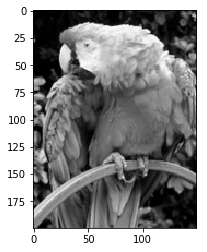

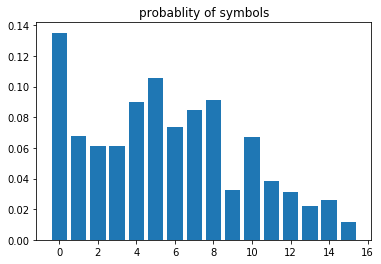

In [50]:
import imageio
import matplotlib.pyplot as plt

birdImg = imageio.imread('./bird.png')
testImg = birdImg>>4
testImg = testImg.ravel()
testImg +=65 # char
char = ''
for i in range(len(testImg)):
    char+=chr(testImg[i])

print('Original file size :',len(testImg)*4,'bits')
length,codeDict,nDict = HuffmanCodeLength(char)
print('Huffman code length::'+str(length)+' bits')
print('Compression ratio  :',round(len(testImg)*4/length,2))


valueList = list(nDict.values())
newDict = {}
for i in range(len(codeDict)):
    valueList[i]/=len(testImg)
    newDict[i] = valueList[i]

plt.imshow(birdImg,'gray')
fig, ax = plt.subplots()
ax.bar(newDict.keys(), newDict.values())
plt.title('probablity of symbols')